In [2]:
import pandas as pd
train=pd.read_csv("/content/train_v9rqX0R.csv")
test=pd.read_csv("/content/test_AbJTz2l.csv")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
warnings.filterwarnings('ignore')

In [4]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1665,FDR32,6.780,Regular,0.000000,Fruits and Vegetables,227.5694,OUT049,1999,Medium,Tier 1,Supermarket Type1,3653.9104
938,FDL38,NaN,Regular,0.025796,Canned,88.4172,OUT019,1985,Small,Tier 1,Grocery Store,89.2172
5918,FDA55,17.200,Regular,0.056942,Fruits and Vegetables,222.5088,OUT013,1987,High,Tier 3,Supermarket Type1,5369.0112
1048,FDE22,9.695,Low Fat,0.029633,Snack Foods,159.6920,OUT045,2002,NaN,Tier 2,Supermarket Type1,958.7520
1791,FDU36,NaN,Low Fat,0.081014,Baking Goods,98.8384,OUT019,1985,Small,Tier 1,Grocery Store,492.6920


In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

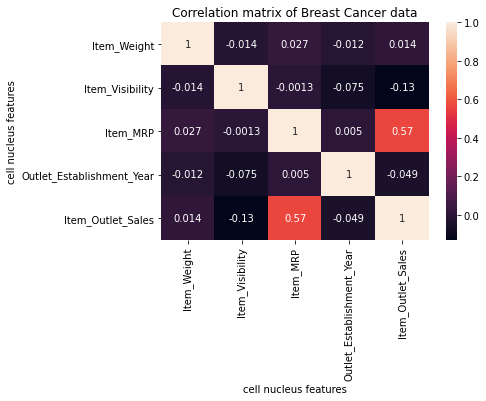

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_mat = train.corr()

sns.heatmap(correlation_mat, annot = True)

plt.title("Correlation matrix of Breast Cancer data")

plt.xlabel("cell nucleus features")

plt.ylabel("cell nucleus features")

plt.show()

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df=pd.concat([train,test])
df.shape

(14204, 12)

In [9]:
df["Item_Identifier"].nunique()

1559

In [10]:
df['Outlet_Establishment_Year']  = df['Outlet_Establishment_Year'].astype('object')

In [11]:
df_cat=df.select_dtypes(include='object')
df_cat.drop(['Item_Identifier'],axis=1,inplace=True)
df_cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
df_num=df.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

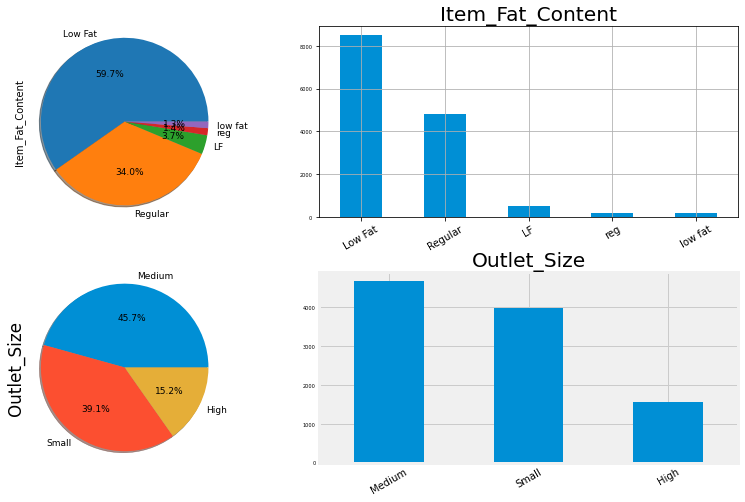

In [13]:
cat_col_1=['Item_Fat_Content','Outlet_Size']
count=1
for cols in cat_col_1:
  plt.subplot(2,2,count)
  df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 9} )
  count+=1
  plt.subplot(2,2,count)
  plt.tight_layout()
  plt.style.use('fivethirtyeight')
  df[cols].value_counts().plot(kind='bar')
  fig=plt.gcf()
  fig.set_size_inches(12,7)
  plt.title('{0}'.format(cols))
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=5)
  plt.xticks(rotation=30)
  count+=1

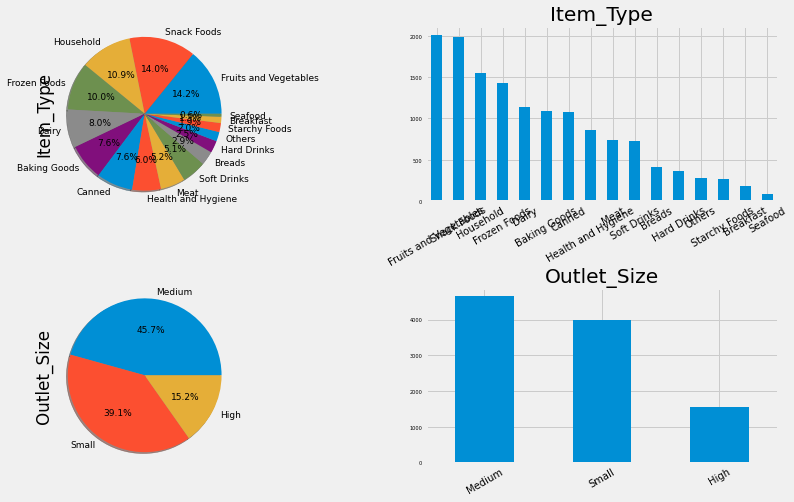

In [14]:
cat_col_1=['Item_Type','Outlet_Size']
count=1
for cols in cat_col_1:
  plt.subplot(2,2,count)
  df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 9} )
  count+=1
  plt.subplot(2,2,count)
  plt.tight_layout()
  plt.style.use('fivethirtyeight')
  df[cols].value_counts().plot(kind='bar')
  fig=plt.gcf()
  fig.set_size_inches(12,7)
  plt.title('{0}'.format(cols))
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=5)
  plt.xticks(rotation=30)
  count+=1

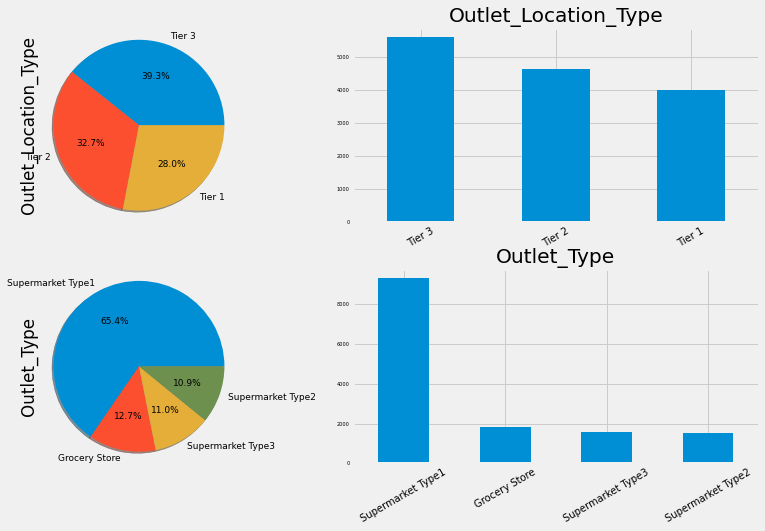

In [15]:
cat_col_1 = [ 'Outlet_Location_Type', 'Outlet_Type']
count=1
for cols in cat_col_1:
  plt.subplot(2,2,count)
  df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 9} )
  count+=1
  plt.subplot(2,2,count)
  plt.tight_layout()
  plt.style.use('fivethirtyeight')
  df[cols].value_counts().plot(kind='bar')
  fig=plt.gcf()
  fig.set_size_inches(12,7)
  plt.title('{0}'.format(cols))
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=5)
  plt.xticks(rotation=30)
  count+=1

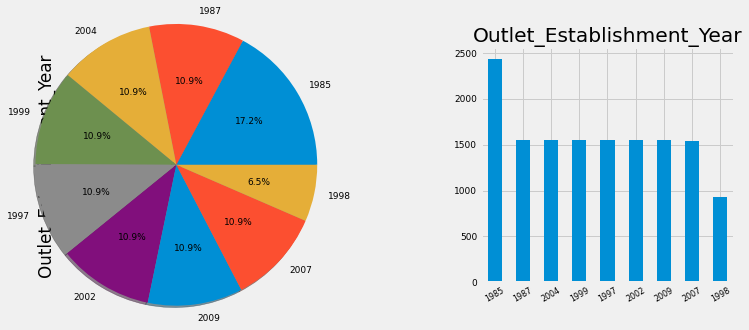

In [16]:
cat_col_1 = [ 'Outlet_Establishment_Year']
count=1
for cols in cat_col_1:
  plt.subplot(1,2,count)
  df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 9} )
  count+=1
  plt.subplot(1,2,count)
  plt.tight_layout()
  plt.style.use('fivethirtyeight')
  df[cols].value_counts().plot(kind='bar')
  fig=plt.gcf()
  fig.set_size_inches(12,4)
  plt.title('{0}'.format(cols))
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=9)
  plt.xticks(rotation=30)
  count+=1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdee4b6e110>,
      dtype=object)

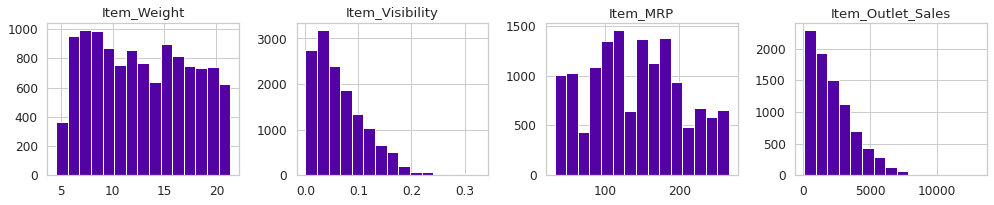

In [17]:
sns.set(style='whitegrid',palette="plasma",font_scale=1.1,rc={"figure.figsize": [8, 5]})
df[list(df_num.columns)].hist(bins=15,figsize=(15,6),layout=(2,4))

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [19]:
Item_Weight_group = df.groupby(["Item_Type","Item_Fat_Content"])["Item_Weight"]

print(Item_Weight_group.median())

df = df.reset_index()

Item_Type      Item_Fat_Content
Baking Goods   LF                  11.6500
               Low Fat             12.3000
               Regular             10.5000
               low fat              8.8275
               reg                 12.5000
                                    ...   
Starchy Foods  LF                  12.6750
               Low Fat             14.0000
               Regular             13.5000
               low fat             10.7925
               reg                 11.8475
Name: Item_Weight, Length: 70, dtype: float64


In [20]:
df.loc[df.Item_Weight.isnull(), 'Item_Weight'] = df.groupby(['Item_Type','Item_Fat_Content']).Item_Weight.transform('median')

In [21]:
df['Outlet_Size'].fillna('Small', inplace=True)

In [22]:
df.drop('index',axis=1,inplace=True)
df.drop('Item_Identifier',axis=1,inplace=True)

In [23]:
df=pd.get_dummies(df,drop_first=True)
train1=df[:train.shape[0]]
test1=df[train.shape[0]:]

In [24]:
print('There are {} rows and {} columns in train'.format(train1.shape[0],train1.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))

train1.drop('Item_Outlet_Sales', axis = 1, inplace = True)
test1.drop('Item_Outlet_Sales', axis = 1, inplace = True)

There are 8523 rows and 47 columns in train
There are 5681 rows and 47 columns in test


In [25]:
validation_size = 0.20
seed = 7

In [29]:
X_train, X_validation, Y_train, Y_validation = train_test_split(train1.values, train['Item_Outlet_Sales'], test_size=validation_size, random_state=seed)

In [30]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([80,82,84,85,90,91,92,94,95,150,200]))

In [32]:
num_folds=10
RMS='neg_mean_squared_error'
model=GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=RMS,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [33]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1145952.636138 using {'n_estimators': 80}
-1145952.636138 (87196.552198) with: {'n_estimators': 80}
-1146167.771212 (87382.411402) with: {'n_estimators': 82}
-1146263.057310 (87326.821851) with: {'n_estimators': 84}
-1146055.714907 (87343.155157) with: {'n_estimators': 85}
-1146033.327582 (87492.220740) with: {'n_estimators': 90}
-1146382.864668 (87443.379828) with: {'n_estimators': 91}
-1146496.228471 (87575.763060) with: {'n_estimators': 92}
-1146191.395204 (87038.709009) with: {'n_estimators': 94}
-1146222.802039 (86835.344335) with: {'n_estimators': 95}
-1155972.960879 (87968.246347) with: {'n_estimators': 150}
-1165291.703530 (88920.452460) with: {'n_estimators': 200}


In [34]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
model.fit(rescaledX,Y_train)
rescaledValidationX=scaler.transform(X_validation)
predictions=model.predict(rescaledValidationX)
print("RMSE = ", mean_squared_error(Y_validation, predictions))

RMSE =  1298301.0548520975


In [35]:
rescaled_test1 = scaler.transform(test1)

In [36]:
predicted_prices = model.predict(rescaled_test1)

In [37]:
submission=pd.read_csv("/content/sample_submission_8RXa3c6.csv")


In [38]:
submission['Item_Outlet_Sales'] = predicted_prices
submission.to_csv('./submission_utkarsh.csv',index=False)

In [39]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1673.162766
1,FDW14,OUT017,1365.152005
2,NCN55,OUT010,670.469889
3,FDQ58,OUT017,2492.056451
4,FDY38,OUT027,6043.182069
